In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import re
import string
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('C:/Users/KIIT/Downloads/NLP/training.csv', encoding='utf-8', dtype='unicode')
df = df[['polarity of tweet','text of the tweet']]
df.to_csv('C:/Users/KIIT/Downloads/NLP/trainingNew.csv',index=False)
df.head()


,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
# STOPWORDS = set(stopwords.words('english'))
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# df['text of the tweet'] = df['text of the tweet'].apply(lambda text: cleaning_stopwords(text))

df2 =df
df2['text of the tweet'] = df2['text of the tweet'].str.lower()


In [10]:
# from nltk.corpus import stopwords
 
# #nltk.download('stopwords')
# #print(stopwords.words('english'))

# stop_final = stopwords.words('english')
# #stop_final = stop_final.remove(["down","up"])
# remove_final = ["up","down","won","wouldn","wouldn't","shouldn't","shouldn","above","below","doesn't","under","won't"]

# stop_final = [ele for ele in stop_final if ele not in remove_final]
# print(type(stopwords.words('english')))

In [11]:
# STOPWORDS = set(stopwords.words('english'))
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# df2['text'] = df2['text'].apply(lambda text: cleaning_stopwords(text))
# df2['text'].head(10)

In [12]:
def remove_username(data):
    temp = [re.sub('@[^\s]+','',data)]
    return temp[0]
df2['text of the tweet'] = df2['text of the tweet'].apply(lambda x: remove_username(x))

In [13]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [14]:
df2['text of the tweet'] = df2['text of the tweet'].apply(lambda x: cleaning_URLs(x))
df2.head()


,polarity of tweet,text of the tweet
0,0,is upset that he can't update his facebook by ...
1,0,i dived many times for the ball. managed to s...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it's not behaving at all. i'm mad. why am..."
4,0,not the whole crew


In [15]:
def cleaning_nums(data):
    modified_string = ''.join(filter(lambda z: not z.isdigit(), data))
    return modified_string
df2['text of the tweet'] = df2['text of the tweet'].apply(lambda x: cleaning_nums(x))

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df2['text of the tweet']= df2['text of the tweet'].apply(lambda x: cleaning_punctuations(x))
df2['text of the tweet'].head(10)

0    is upset that he cant update his facebook by t...
1     i dived many times for the ball managed to sa...
2      my whole body feels itchy and like its on fire 
3     no its not behaving at all im mad why am i he...
4                                  not the whole crew 
5                                          need a hug 
6     hey  long time no see yes rains a bit only a ...
7                            i just repierced my ears 
8     i couldnt bear to watch it  and i thought the...
9     it it counts idk why i did either you never t...
Name: text of the tweet, dtype: object

In [17]:
df2

,polarity of tweet,text of the tweet
0,0,is upset that he cant update his facebook by t...
1,0,i dived many times for the ball managed to sa...
2,0,my whole body feels itchy and like its on fire
3,0,no its not behaving at all im mad why am i he...
4,0,not the whole crew
...,...,...
1048567,4,my grandma is making dinenr with my mum
1048568,4,midmorning snack time a bowl of cheese noodles...
1048569,4,same here say it like from the terminiator m...
1048570,4,im great thaanks wbuu


In [18]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df2['text of the tweet'] = df2['text of the tweet'].apply(lambda x: lemmatize_text(x))


In [19]:
df2

,polarity of tweet,text of the tweet
0,0,"[is, upset, that, he, cant, update, his, faceb..."
1,0,"[i, dived, many, time, for, the, ball, managed..."
2,0,"[my, whole, body, feel, itchy, and, like, it, ..."
3,0,"[no, it, not, behaving, at, all, im, mad, why,..."
4,0,"[not, the, whole, crew]"
...,...,...
1048567,4,"[my, grandma, is, making, dinenr, with, my, mum]"
1048568,4,"[midmorning, snack, time, a, bowl, of, cheese,..."
1048569,4,"[same, here, say, it, like, from, the, termini..."
1048570,4,"[im, great, thaanks, wbuu]"


In [20]:
df2.rename(columns={"text of the tweet":"text","polarity of tweet":"polarity"}, inplace="True")

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import TextVectorization

X = df2.text.astype(str)
y = df2.polarity.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [54]:
import pickle

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
pickle.dump(tfidf_vectorizer, open("vectorizer.pickle", "wb")) 
#pickle.load(open("vectorizer.pickle", 'rb'))     // Load vectorizer


In [56]:
model = pickle.load(open("vectorizer.pickle", 'rb'))     
X_train = model.fit_transform(X_train)

In [57]:
X_test = model.fit_transform(X_test)

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [59]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

#predicted y
y_pred = naive_bayes_classifier.predict(X_test)

In [60]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.78      0.99      0.87    160130
    Negative       0.69      0.08      0.14     49585

    accuracy                           0.77    209715
   macro avg       0.73      0.53      0.51    209715
weighted avg       0.76      0.77      0.70    209715



In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])


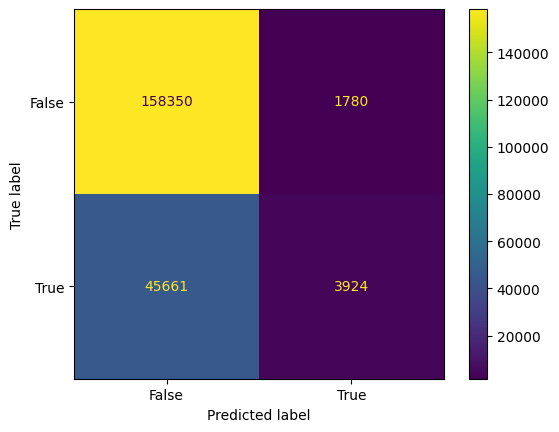

In [62]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [63]:
ac = accuracy_score(y_test,y_pred)
ac

0.773783468039959

In [64]:
import tensorflow as tf
from sklearn import preprocessing
from keras import regularizers

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [65]:
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(838857, 1000)
(104857, 1000)
(104858, 1000)


In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

In [68]:
#model.add(tf.keras.layers.Dense(96,activation="relu",kernel_regularizer=regularizers.L2(0.26244)))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), metrics=["accuracy"])

In [69]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_cv, y_cv))

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]
            ^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py", line 515, in slice_array
    return training_utils.slice_arrays(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
                ~^^^^^^^^^^^

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1604]